Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np

Reading DataSet

In [2]:
dataset=pd.read_csv('labeled_data.csv')

Stating labels as per the Dataset

In [3]:
dataset["labels"]= dataset["class"].map({0: "Hate Speech", 1: "Hate Speech", 2:"Not Hate Speech"})

Reducing the dataset to only the tweets and labels

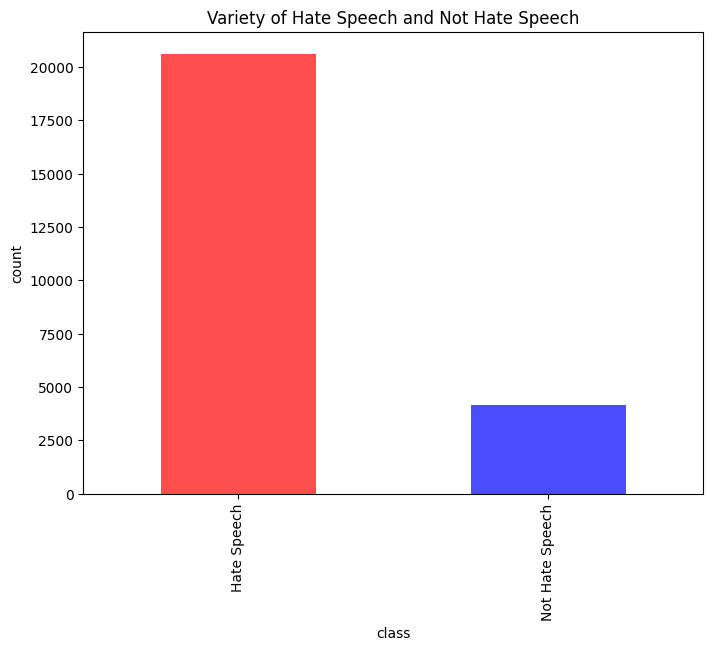

In [4]:
import matplotlib.pyplot as plt
data=dataset['labels'].value_counts()
# Plotting the bar graph
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Variety of Hate Speech and Not Hate Speech')
plt.xlabel('class')
plt.ylabel('count')
plt.xticks(range(len(data)), data.index)
plt.show()

In [5]:
dataset=dataset[["tweet","labels"]]

In [6]:
print(dataset.head())

                                               tweet           labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  Not Hate Speech
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      Hate Speech
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      Hate Speech
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      Hate Speech
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      Hate Speech


Importing libraries for NLP

In [7]:
import re
import nltk
import string

Downloading and importing stopwords

In [8]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

Stemmer

In [9]:
stemmer=nltk.SnowballStemmer('english',ignore_stopwords=True)

Function to clean data

In [10]:
def clean(tweet):
  tweet= tweet.lower()
  tweet= re .sub('[.?]','', tweet)
  tweet= re.sub('<.?>+', '', tweet)
  tweet= re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
  tweet= re.sub('\n', '', tweet)
  tweet= [word for word in tweet.split(' ')if word not in stopword]
  tweet= " ".join(tweet)
  tweet= [stemmer.stem(word) for word in tweet.split(' ')]
  tweet= " ".join(tweet)
  return tweet

Applying the clean function to dataset

In [11]:
dataset["tweet"] = dataset["tweet"].apply(clean)

In [12]:
print(dataset.head())

                                               tweet           labels
0   rt mayasolov woman shouldnt complain clean ho...  Not Hate Speech
1   rt mleew17 boy dat coldtyga dwn bad cuffin da...      Hate Speech
2   rt urkindofbrand dawg rt 80sbaby4lif ever fuc...      Hate Speech
3             rt cganderson vivabas look like tranni      Hate Speech
4   rt shenikarobert shit hear might true might f...      Hate Speech


Counting number of NULL values

In [13]:
print(dataset.isnull().sum())

tweet     0
labels    0
dtype: int64


Seperating the Dataset

In [14]:
x= np.array(dataset["tweet"])
y= np.array(dataset["labels"])

In [15]:
print(x)

[' rt mayasolov woman shouldnt complain clean hous amp man alway take trash'
 ' rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place'
 ' rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit'
 ... 'young buck wanna eat dat nigguh like aint fuckin dis'
 'youu got wild bitch tellin lie'
 'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll httptcoh0dyebvnzb']


In [16]:
print(y)

['Not Hate Speech' 'Hate Speech' 'Hate Speech' ... 'Hate Speech'
 'Hate Speech' 'Not Hate Speech']


Feature Extraction

In [17]:
# from sklearn. feature_extraction. text import CountVectorizer
# cv= CountVectorizer()
# X= cv.fit_transform(x)
from sklearn.feature_extraction.text import TfidfVectorizer 
# Forming the TF-IDF model
cv = TfidfVectorizer()
cv.fit(x)

def vectorize(train_data):
    X = cv.transform(train_data)
    return X
X = vectorize(x)

Dividing the Dataset into train and test

In [18]:
from sklearn. model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X ,y, test_size=0.33, random_state= 42)

Model Building

In [20]:
from sklearn. tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=100)

# from sklearn.naive_bayes import MultinomialNB

# # Replace the DecisionTreeClassifier with MultinomialNB
# model = MultinomialNB()

# from sklearn.neighbors import KNeighborsClassifier
# k = 10  
# model = KNeighborsClassifier(n_neighbors=k)

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=42)


Training the model

In [21]:
model. fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

Testing the Model

In [22]:
y_pred= model.predict (X_test)
print(y_pred)

['Hate Speech' 'Hate Speech' 'Hate Speech' ... 'Not Hate Speech'
 'Hate Speech' 'Hate Speech']


Accuracy of Model

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy :\n", accuracy_score(y_test, y_pred)*100)
print("Report :\n",classification_report(y_test, y_pred))

0.9364225455434649
Confusion Matrix:
 [[6515  285]
 [ 235 1144]]
Accuracy :
 93.6422545543465
Report :
                  precision    recall  f1-score   support

    Hate Speech       0.97      0.96      0.96      6800
Not Hate Speech       0.80      0.83      0.81      1379

       accuracy                           0.94      8179
      macro avg       0.88      0.89      0.89      8179
   weighted avg       0.94      0.94      0.94      8179



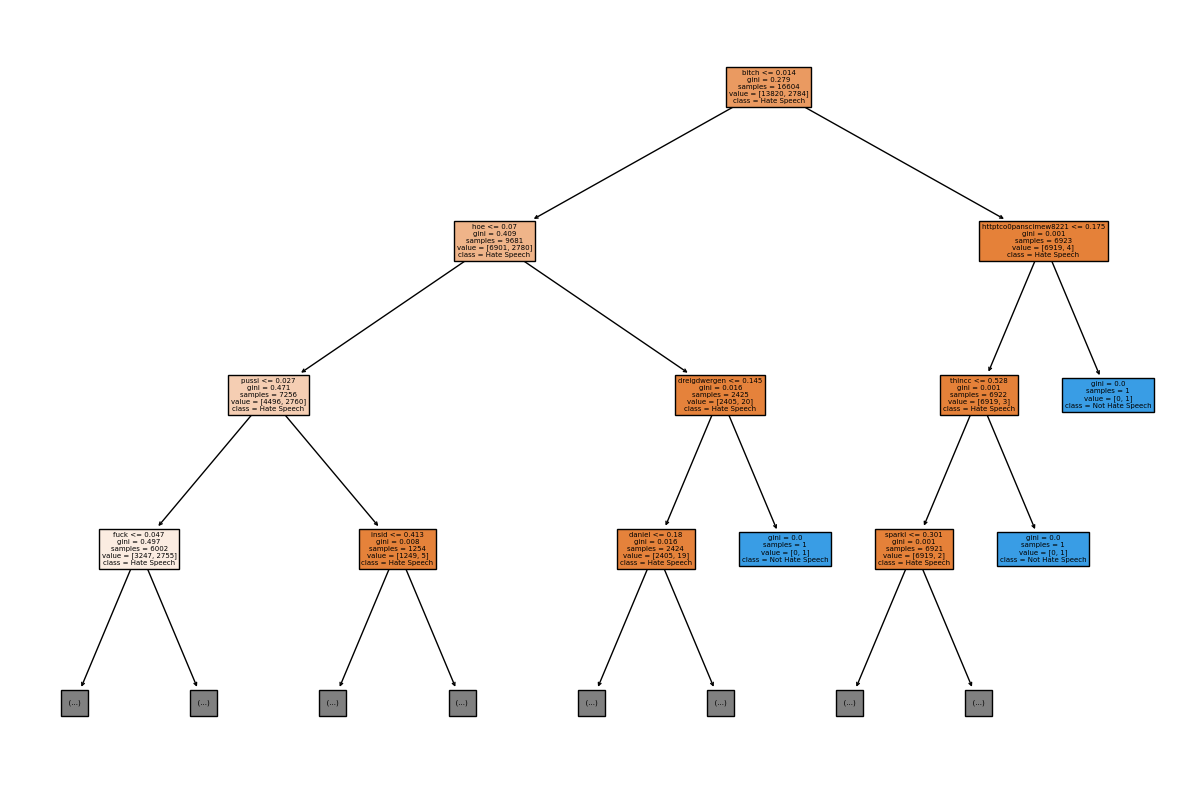

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, class_names=['Hate Speech', 'Not Hate Speech'], feature_names=cv.get_feature_names_out(),max_depth=3)
plt.show()

In [25]:
# import pickle
# pickle.dump(model,open('modelfile.pkl','wb'))